# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
sales_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', sep=';')

In [3]:
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


### Convert the SalesDate field to a datetime data type.

In [5]:
sales_df.SalesDate = pd.to_datetime(sales_df.SalesDate)
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


### Create a line chart showing the number of total units sold per day in February.

In [7]:
sales_df['Weekday'] = sales_df.SalesDate.dt.weekday
sales_df['Day'] = sales_df.SalesDate.dt.day
sales_df['Month'] = sales_df.SalesDate.dt.strftime('%B')
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Weekday,Day,Month
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,0.0,5.0,February
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,4.0,2.0,February
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,3.0,3.0,May
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,5.0,7.0,April
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,0.0,12.0,February


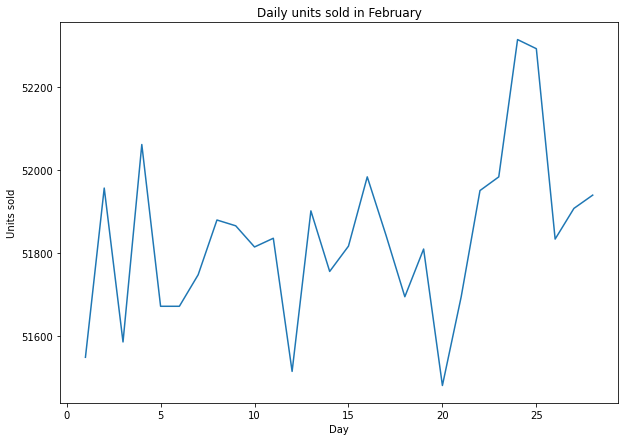

In [8]:
plt.figure(figsize=(10,7))
sales_df.loc[lambda x: x.Month == 'February'].groupby('Day').count()['Quantity'].plot()
plt.ylabel('Units sold')
plt.title('Daily units sold in February')
plt.show()

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [9]:
filterd_sales_df = sales_df.loc[lambda x: x.ProductID.isin([124, 344, 407, 449])]
filterd_sales_df_march = filterd_sales_df.loc[lambda x: x.Month == 'March']
filterd_sales_df_march

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Weekday,Day,Month
31,32,22,47694,124,13,0.2,"0,00",2018-03-04 07:09:32.220,ZOAVW4V6EBSQ71HAT5KZ,6.0,4.0,March
98,99,17,92090,124,24,0.2,"0,00",2018-03-24 15:29:24.980,I78H3546AWIT4D2QS9FG,5.0,24.0,March
232,233,19,62970,407,16,NaN,"0,00",2018-03-01 05:43:52.130,WBUXH9VP5ID73G3LUS5G,3.0,1.0,March
696,697,11,96920,124,25,NaN,"0,00",2018-03-09 23:59:54.780,II54BNTNEAQ1FQ5OO9SG,4.0,9.0,March
1677,1678,7,16978,449,5,NaN,"0,00",2018-03-09 10:01:48.050,QS1H99B00E8QD5CQL4KZ,4.0,9.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
6755205,6755206,16,30247,344,8,NaN,"0,00",2018-03-24 21:33:32.190,D03VA4PXU9BS7TCN4U0H,5.0,24.0,March
6755470,6755471,19,38150,124,10,NaN,"0,00",2018-03-10 15:45:43.650,H5D3B7HW2JGKOY6VES8P,5.0,10.0,March
6755491,6755492,19,56699,344,15,0.2,"0,00",2018-03-02 13:28:51.560,FXAN2M4RLGG7KMLYENBI,4.0,2.0,March
6756781,6756782,8,98057,449,25,NaN,"0,00",2018-03-27 02:58:42.810,53T08LR7FQSPW47JGZ5C,1.0,27.0,March


In [10]:
sales_march = filterd_sales_df_march.pivot_table(index='Day', 
                    columns='ProductID', values='Quantity', aggfunc='count')
sales_march

ProductID,124,344,407,449
Day,,,,
1.0,129,108,116,106
2.0,134,112,125,111
3.0,105,133,107,109
4.0,109,121,102,101
5.0,128,98,118,109
6.0,112,124,110,112
7.0,128,124,131,118
8.0,126,131,130,121
9.0,113,116,98,109


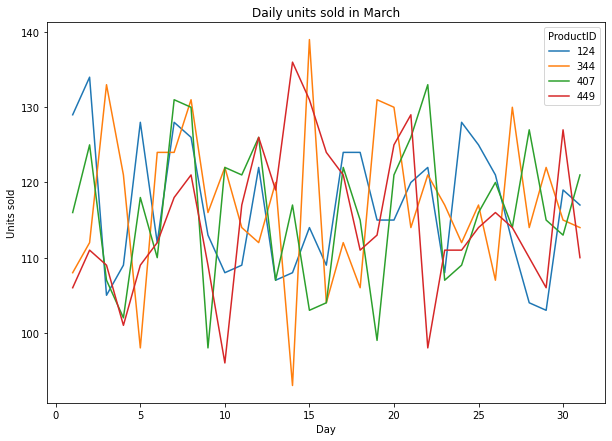

In [11]:
sales_march.plot(kind='line', figsize=(10,7))
plt.ylabel('Units sold')
plt.title('Daily units sold in March')
plt.show()

### Create a bar chart that shows units sold by each hour of the day.

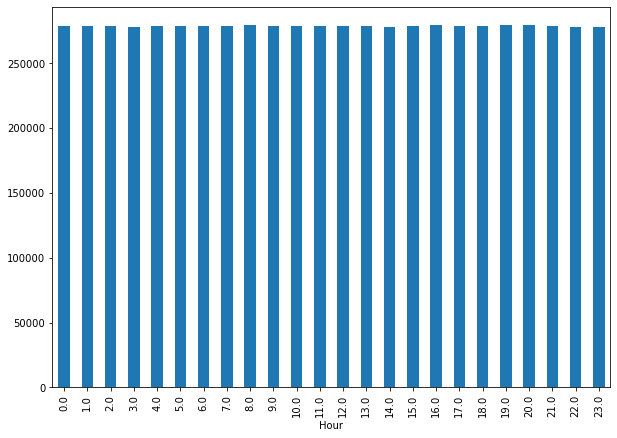

In [12]:
sales_df['Hour'] = sales_df.SalesDate.dt.hour
plt.figure(figsize=(10,7))
sales_df.groupby('Hour').count()['Quantity'].plot(kind='bar')
plt.show()

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [13]:
heatmap_df = sales_df.pivot_table(index='Hour', 
                                  columns='Weekday', values='Quantity', aggfunc='count')
heatmap_df

Weekday,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Hour,,,,,,,
0.0,41110,40899,41223,38821,38938,39123,38991
1.0,40913,40892,40733,38816,39320,38858,38979
2.0,40964,41398,41225,38983,38922,39111,38537
3.0,40863,40675,41080,38872,38819,38896,38737
4.0,40759,40752,41047,39014,39146,38955,38807
5.0,41288,41121,40973,38983,38988,38615,38902
6.0,40898,41114,40958,38861,38883,39218,39180
7.0,40993,40954,41417,38642,38674,39074,38798
8.0,40885,41093,41315,38796,38823,39208,39139


### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

<AxesSubplot:xlabel='Weekday', ylabel='Hour'>

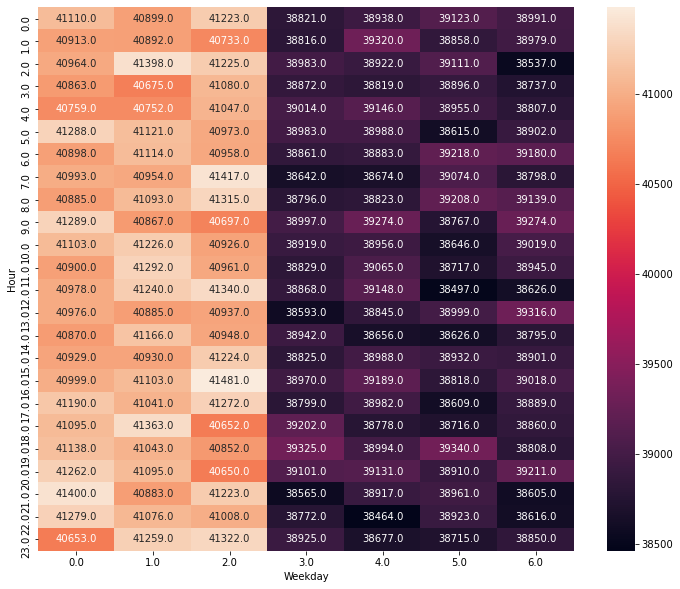

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_df, annot=True, fmt='.1f')

### Create a histogram showing the distribution of daily units sold.

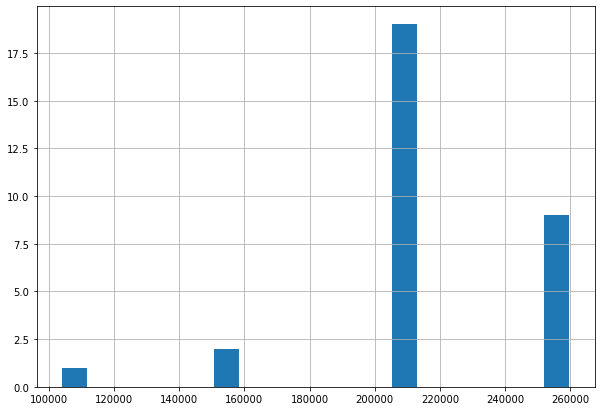

In [24]:
plt.figure(figsize=(10,7))
sales_df.groupby('Day').count()['Quantity'].hist(bins=20)
plt.show()

### Create a violin plot showing the distribution of daily units sold by month.

In [20]:
sales_month = sales_df.pivot_table(index='Day', 
                    columns='Month', values='Quantity', aggfunc='count')
sales_month.head()

Month,April,February,January,March,May
Day,,,,,
1.0,52087.0,51549.0,51856.0,51583.0,51964.0
2.0,51829.0,51957.0,52059.0,51544.0,51770.0
3.0,51994.0,51586.0,51306.0,51894.0,51977.0
4.0,52012.0,52062.0,51527.0,51782.0,52258.0
5.0,51807.0,51672.0,52101.0,51604.0,51560.0


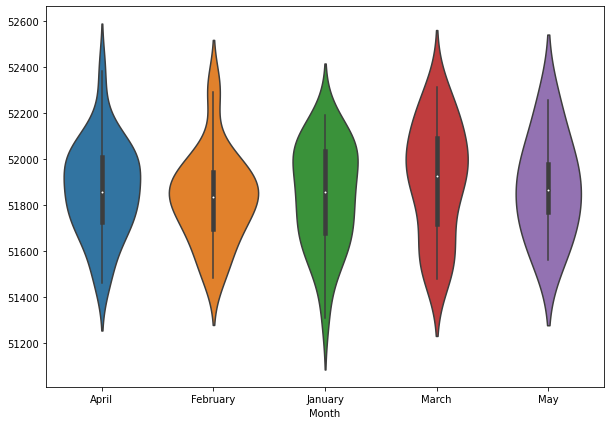

In [23]:
plt.figure(figsize=(10,7))
sns.violinplot(data=sales_month)
plt.show()